<center><h1>Boston House Pricing</h1></center>

In [30]:
#Importing the libararies
import os
import kaggle
from getpass import getpass
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neural_network import MLPRegressor
from sklearn import metrics

### Downloading The Dataset from Kaggle

In [1]:
#Function to download Dataset from Kaggle.
def download_dataset(dataset, path):
    if 'KAGGLE_USERNAME' not in os.environ or 'KAGGLE_KEY' not in os.environ:
        os.environ['KAGGLE_USERNAME'] = input('Enter your Kaggle username: ')
        os.environ['KAGGLE_KEY'] = getpass('Enter your Kaggle API key: ')
    
    kaggle.api.dataset_download_files(dataset, path=path, unzip=True)

dataset = 'vikrishnan/boston-house-prices' 
path = './data' 

download_dataset(dataset, path)

Enter your Kaggle username:  kartikathwal
Enter your Kaggle API key:  ········


Dataset URL: https://www.kaggle.com/datasets/vikrishnan/boston-house-prices


### Importing Dataset and setting up the columns
Initial information: <br>

<b>The Boston Housing Dataset</B><br>

The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA. The following describes the dataset columns:<br>
ZN: proportion of residential land zoned for lots over 25,000 sq.ft. <br>
INDUS: proportion of non-retail business acres per town<br>
CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)<br>
NOX: nitric oxides concentration (parts per 10 million)<br>
RM: average number of rooms per dwelling<br>
AGE: proportion of owner-occupied units built prior to 1940<br>
DIS: weighted distances to ﬁve Boston employment centers<br>
RAD: index of accessibility to radial highways<br>
TAX: full-value property-tax rate per 10,000 dollars <br>
PTRATIO: pupil-teacher ratio by town 12. B: 1000(Bk−0.63)2 where Bk is the proportion of blacks by town 13. <br>
LSTAT: % lower status of the population<br>
MEDV: Median value of owner-occupied homes in $1000s<br>
We can see that the input attributes have a mixture of units.

In [1]:
#importing dataset and setting up columns
import os
import pandas as pd
column=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
csv_file = os.path.join('./data', 'housing.csv') 
df = pd.read_csv(csv_file, names=column, header=None, delimiter=r"\s+")
df.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [2]:
#shape
df.shape

(506, 14)

In [3]:
#checking data info.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [4]:
#summmerizing data to see distribution
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


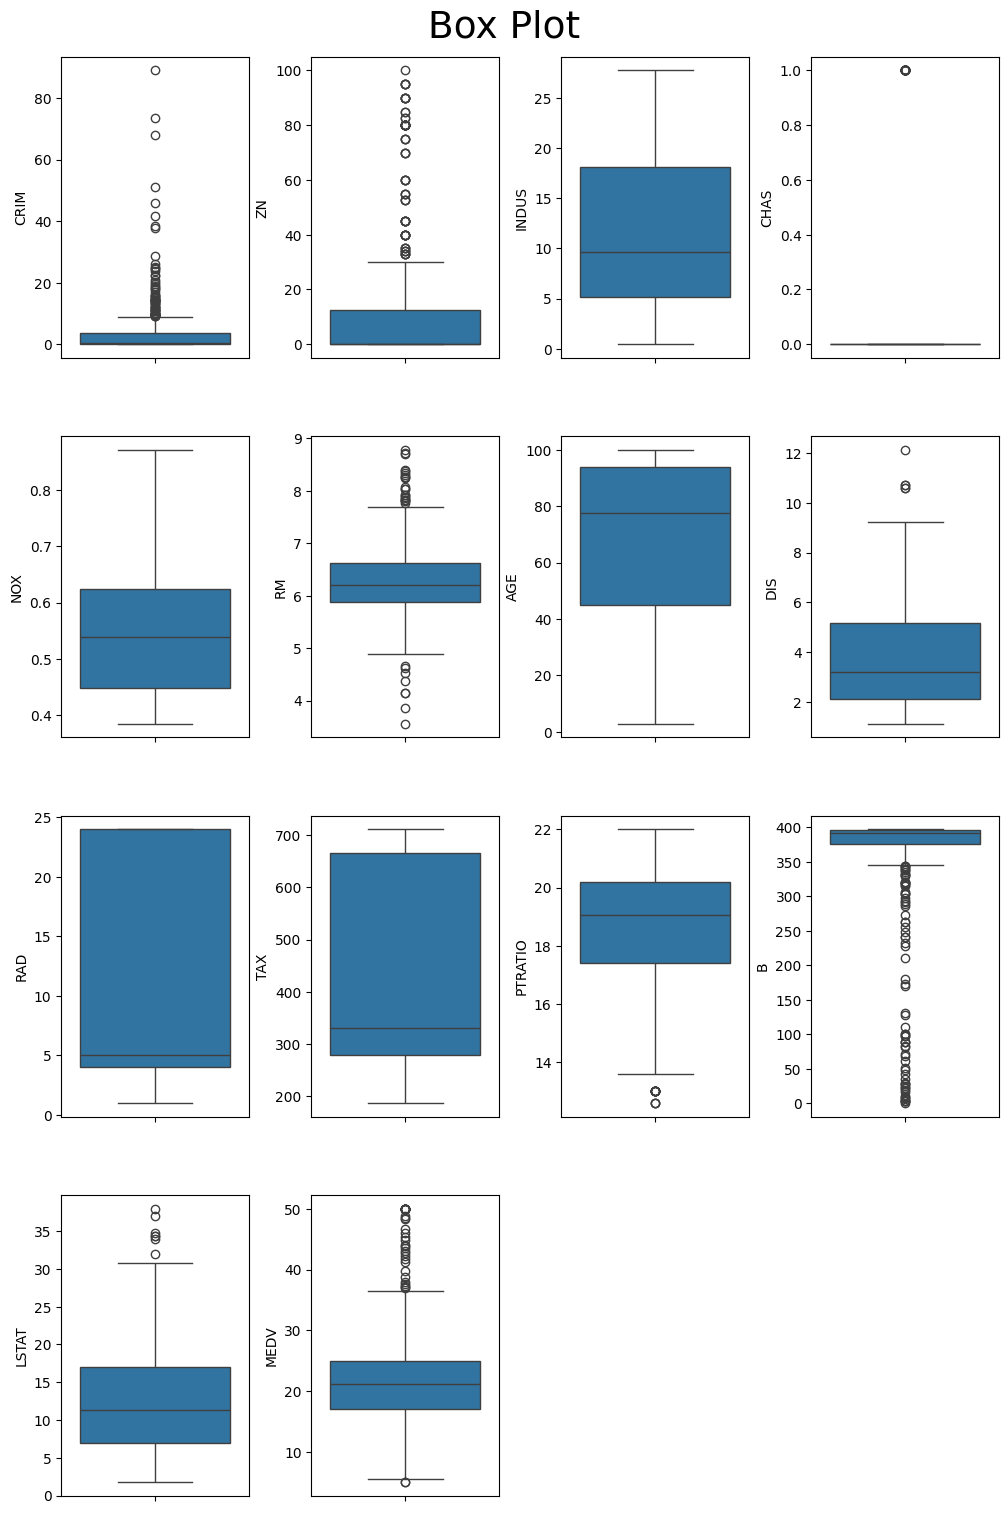

In [7]:
##Checking outliers by box plots.
def visual_box(df, rows, cols, suptitle):
    num_plots = rows * cols #
    if len(df.columns) < num_plots:
        num_plots = len(df.columns)
    fig,axs= plt.subplots(nrows=rows, ncols=cols, figsize=(10,15))
    fig.suptitle(suptitle,y=1, size=27)
    axs = axs.flatten()
    index=0
    for i, c in df.items():
        sns.boxplot(y=i, data=df, ax=axs[index])
        index+=1
    #removing any extra subplots if formed
    for j in range(num_plots, rows * cols):
        fig.delaxes(axs[j])
    plt.tight_layout(pad=0.4,w_pad=0.5,h_pad=5.0)
visual_box(df, rows=4, cols=4, suptitle="Box Plot")

#### We can conclude that ZN might not be useful as the the value of 25 and 50 percentile is 0, CHAS is also dummy variable and hence might not be useful. We will also be removing MEDV outliers as they won't be helpful to us.

In [8]:
#removing MEDV outliers
df = df[~(df['MEDV'] >= 50.0)]

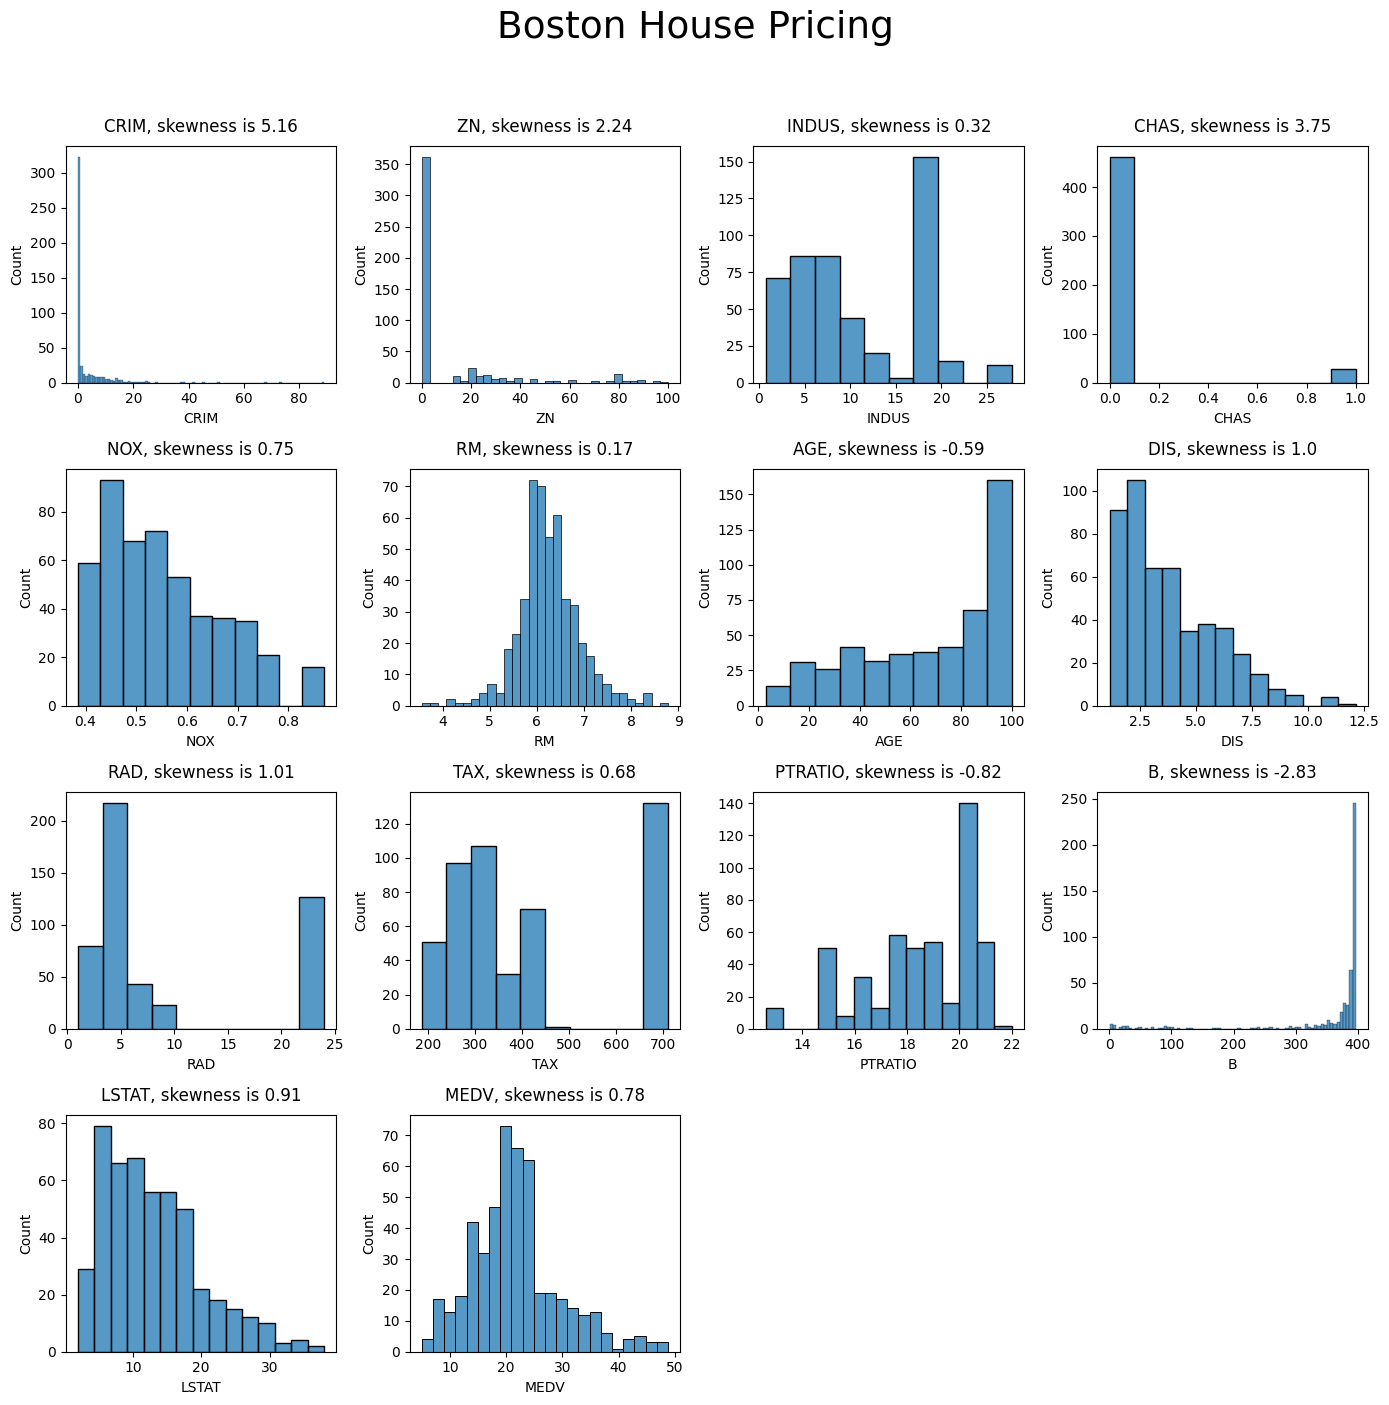

In [9]:
#visualizaing distribution and skewness
def visual_dist(df,rows, cols, suptitle):
    num_plots = rows * cols
    if len(df.columns) < num_plots:
        num_plots = len(df.columns)
    fig, axs = plt.subplots(nrows=rows,ncols=cols,figsize=(14,14))
    fig.suptitle(suptitle,y=1, size=27)
    axs = axs.flatten()
    for i, col in enumerate(df.columns[:num_plots]):
        sns.histplot(df[col], ax=axs[i])
        axs[i].set_title(col + ', skewness is '+str(round(df[col].skew(axis = 0, skipna = True),2)),pad=10)
    #hiding extra plots if they are formed.
    for j in range(num_plots, rows * cols):
        fig.delaxes(axs[j]) 

visual_dist(df, rows=4, cols=4, suptitle='Boston House Pricing')
plt.tight_layout(rect=[0, 0, 1, 0.97])

<Axes: >

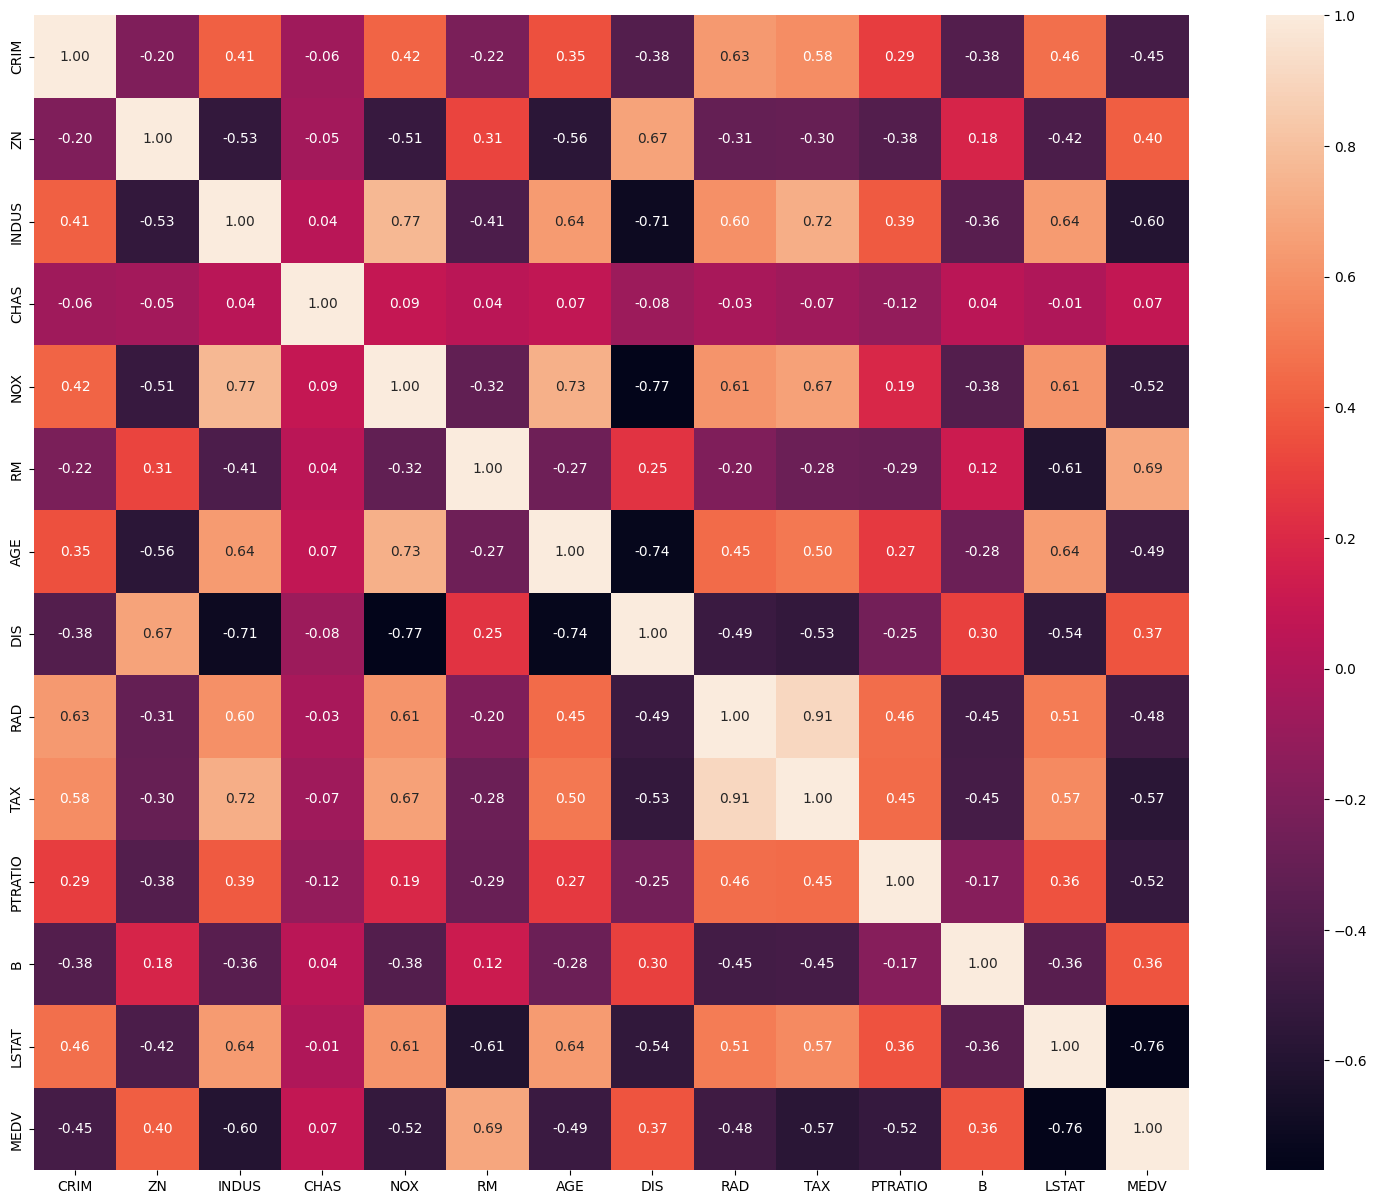

In [10]:
#Checking the correlation matrix of left data
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), cbar=True, square=True, fmt='.2f', annot=True)

In [11]:
#Indus,NOX, RM, Tax , Ptratio, LSTAT are in good coorelation with MEDV hence we'll use them for prediction and removing outliers for MED
col=[ 'INDUS', 'NOX', 'RM', 'TAX' ,'PTRATIO', 'LSTAT', 'MEDV']
df=df[col]
df.head()

,INDUS,NOX,RM,TAX,PTRATIO,LSTAT,MEDV
0,2.31,0.538,6.575,296.0,15.3,4.98,24.0
1,7.07,0.469,6.421,242.0,17.8,9.14,21.6
2,7.07,0.469,7.185,242.0,17.8,4.03,34.7
3,2.18,0.458,6.998,222.0,18.7,2.94,33.4
4,2.18,0.458,7.147,222.0,18.7,5.33,36.2


Multivariate Visualization

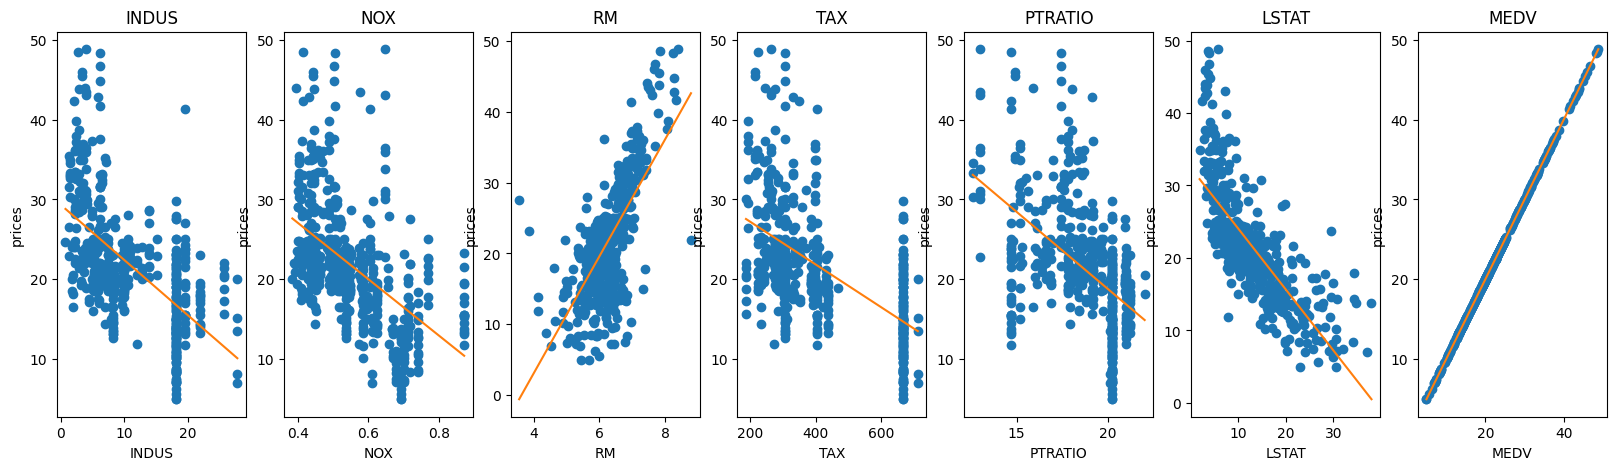

In [12]:
plt.figure(figsize=(20, 5))
for i, col in enumerate(df.columns):
    plt.subplot(1, 7, i+1)
    x = df[col]
    y = df['MEDV']
    plt.plot(x, y, 'o')
    # Create regression line
    plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('prices')

Splitting Dataset

In [25]:
X=df.drop(['MEDV'],axis=1)
Y=df['MEDV']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 7)

### Linear Regression

Creating model instance

In [14]:
#Model
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [15]:
#Intercept
lm.intercept_

23.178099341693134

In [16]:
#Coefficients
coeffcients = pd.DataFrame([X_train.columns,lm.coef_]).T
coeffcients = coeffcients.rename(columns={0: 'Attribute', 1: 'Coefficients'})
coeffcients

,Attribute,Coefficients
0,INDUS,-0.006819
1,NOX,-5.644968
2,RM,3.960627
3,TAX,-0.005815
4,PTRATIO,-0.837305
5,LSTAT,-0.402306


In [56]:
#Training
y_pred_tr = lm.predict(X_train)
y_pred_t=lm.predict(X_test)

In [48]:
#Checking the scores
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.730156649998188
Adjusted R^2: 0.7259512990890689
MAE: 3.114358365203876
MSE: 17.20401422206196
RMSE: 4.147772199875731


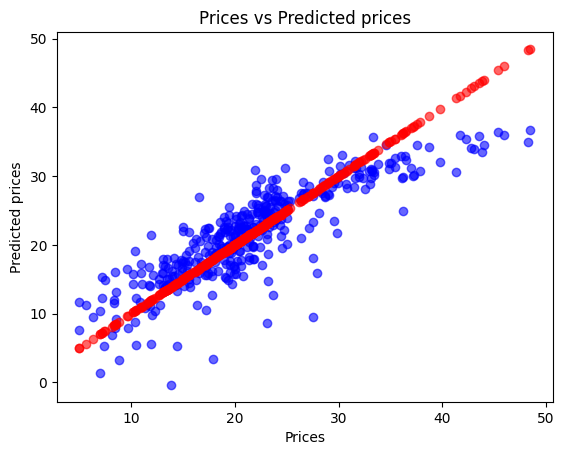

In [58]:
#Training Visualization
plt.scatter(y_train, y_pred_tr, color='blue', alpha=0.6, label='Predicted')
plt.scatter(y_train, y_train, color='red', alpha=0.6, label='Actual')
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

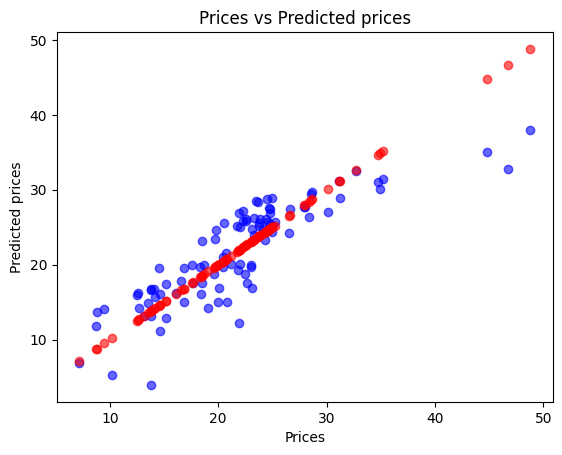

In [59]:
#Prediction Model Visualization

plt.scatter(y_test, y_pred_t, color='blue', alpha=0.6, label='Predicted')
plt.scatter(y_test, y_test, color='red', alpha=0.6, label='Actual')
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

In [62]:
train_mse = mean_squared_error(y_train, y_pred_tr)
test_mse = mean_squared_error(y_test, y_pred_t)
train_r2 = r2_score(y_train, y_pred_tr)
test_r2 = r2_score(y_test, y_pred_t)

print(f'Training MSE: {train_mse}')
print(f'Testing MSE: {test_mse}')
print(f'Training R2 Score: {train_r2}')
print(f'Testing R2 Score: {test_r2}')

Training MSE: 17.20401422206196
Testing MSE: 14.341784902425045
Training R2 Score: 0.730156649998188
Testing R2 Score: 0.7325502329038438


Model Evaluation score is almost identical hence there's no overfitting,
with R^2 value as >0.7 it is considered to be strong effect size and we are able to explain approx 73% of the variation in the target variable. 

# MLP REGRESSION
Reason: MLPRegressor can capture complex, non-linear relationships between the features and the target variable.
Traditional linear models may struggle with datasets where the relationship between features and the target variable is not linear.

In [26]:
#Standardizing data
scaler = StandardScaler()
X_trainmlp = scaler.fit_transform(X_train)
X_testmlp = scaler.transform(X_test)

# Create the MLPRegressor model
mlp = MLPRegressor(hidden_layer_sizes=(50, 50), activation='relu', solver='adam', learning_rate_init=0.01, max_iter=1000, random_state=42)

# Train the model
mlp.fit(X_trainmlp, y_train)

# Make predictions
y_train_pred = mlp.predict(X_trainmlp)
y_test_pred = mlp.predict(X_testmlp)

In [38]:
print('R^2:',metrics.r2_score(y_train, y_train_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_train_pred))*(len(y_train)-1)/(len(y_train)-X_trainmlp.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_train_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_train_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)))

R^2: 0.9078402243094136
Adjusted R^2: 0.906403968064885
MAE: 1.8010947675430284
MSE: 5.875698221476428
RMSE: 2.423983956522078


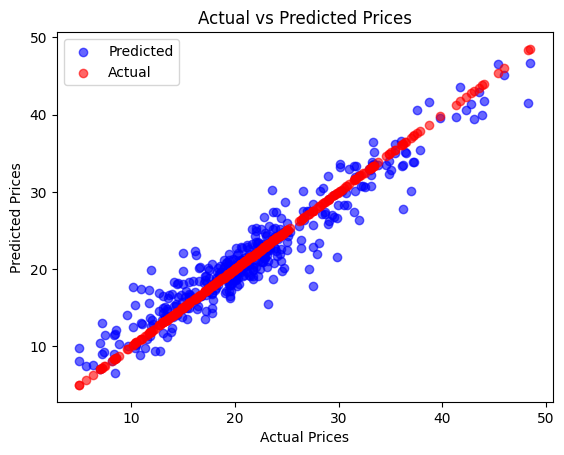

In [45]:
#Visualizing the training
plt.scatter(y_train, y_train_pred, color='blue', alpha=0.6, label='Predicted')
plt.scatter(y_train, y_train, color='red', alpha=0.6, label='Actual')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.legend()
plt.show()

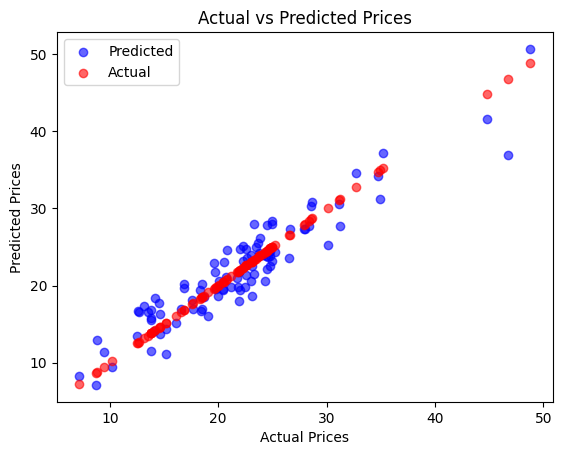

In [60]:
#Visualizing the test data performance
plt.scatter(y_test, y_test_pred, color='blue', alpha=0.6, label='Predicted')
plt.scatter(y_test, y_test, color='red', alpha=0.6, label='Actual')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.legend()
plt.show()

In [61]:
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f'Training MSE: {train_mse}')
print(f'Testing MSE: {test_mse}')
print(f'Training R2 Score: {train_r2}')
print(f'Testing R2 Score: {test_r2}')

Training MSE: 5.875698221476428
Testing MSE: 6.122088974293526
Training R2 Score: 0.9078402243094136
Testing R2 Score: 0.8858335080705407


As we can see with R2 Score as 90 and Testing R2 Score as 88 we have exaplined the connection way better compared to linear regression, hence increasing our accuracy and prediction